In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import prepare_data
from src.model_code import MH_regression, Gibbs_regression, running_mean
from src.diagnostics import MCMC_diagnostics

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = pd.read_csv('../student/student-mat.csv', sep=";")
features, target = prepare_data(df)

In [4]:
betas, sigmas = Gibbs_regression(features, target, B=20000)

In [5]:
thinned_betas = betas[:,::10]
results = pd.DataFrame(thinned_betas.T, columns = features.columns)

C:\Users\Luke\.conda\envs\bayes\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Luke\.conda\envs\bayes\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


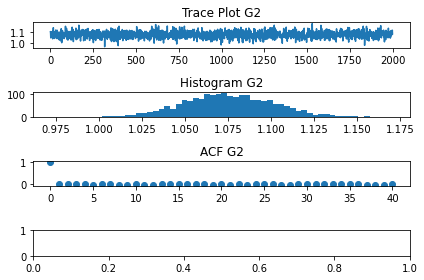

In [6]:
MCMC_diagnostics(results['G2'], 'G2')

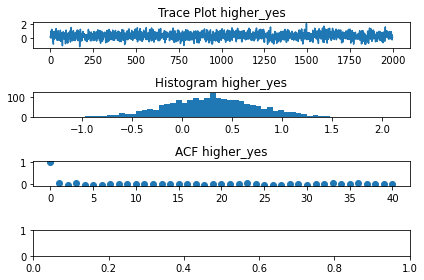

In [7]:
MCMC_diagnostics(results['higher_yes'], 'higher_yes')

In [8]:
quants = results.quantile((0.05, 0.5, 0.95))
quants

,intercept,age,sex_M,failures,higher_yes,Medu,absences,G2
0.05,-2.056325,-0.258603,-0.038355,-0.487062,-0.454561,-0.148933,0.022065,1.031354
0.50,0.378269,-0.124121,0.275919,-0.246910,0.295489,-0.003559,0.042987,1.074314
0.95,2.985681,0.007338,0.592973,-0.006590,1.077855,0.156374,0.063124,1.118885


In [7]:
results.to_csv('results/01_beta_dists.csv', index=False)